# Lecture 8

## Newton's Fractal

The Newton-Raphson method also works well for complex numbers. For example, for the function $f(z) = z^{3} - 1$, in the real space, there is only one root which we found before (1). However, if we include complex numbers too, we have three roots - 1, $-\frac{1}{2} \pm \frac{3}{2}i$. We can start from an initial point $z_{0}$, and we have $f'(x) = 3z^{2}$. So, by Newton-Raphson method,

$z_{1} = z_{0} - \frac{z^{3} - 1}{3z^{2}}$,

and we can calculate further terms like $z_{2}, z_{3}, \dots$

Depending on the initial choice of $z_0$, the iteration converges to one of the three roots, and when we plot this so-called basin of attraction, we get a fractal-like pattern. The fractal boundary appears because points near the boundary of basins of attraction exhibit chaotic behaviour as small changes in the initial condition $z_0$ leads to different roots.

<hr>

## Problem 9

Use the Newton-Raphson method (discussed in class) to find all the roots of $x^{3} = 1$.

Note: Here, I have generalised the algo for any power $n$ of $z$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(z, n):
    return z**n - 1

def df(z, n):
    return n*z**(n-1)

In [15]:
def nr_comp(z, n, tol = 1e-6, max_iter = 200):
    for i in range(max_iter):
        fz, dfz = f(z, n), df(z, n)
        z_next = z - (fz/df(z, n))
        if abs(dfz) < tol:
            return None, i # checking derivative near critical points as we got gaps in the plot before
        if abs(z_next - z) < tol:
            return z_next, i
        z = z_next
    return None, max_iter

# def points(x, y, n):
#     root = nr_comp(complex(x, y), n)
#     if root is None:
#         return
#     for r in roots:
#         if np.abs(r - root) < tol:
#             root_points[r].append((x, y))
#             break

In [16]:
# cartesian product to generate a set of points on the complex plane
def cart(l1, l2):
    result = []
    for i in l1:
        for j in l2:
            result.append((i, j))
    return result

Enter order:  3


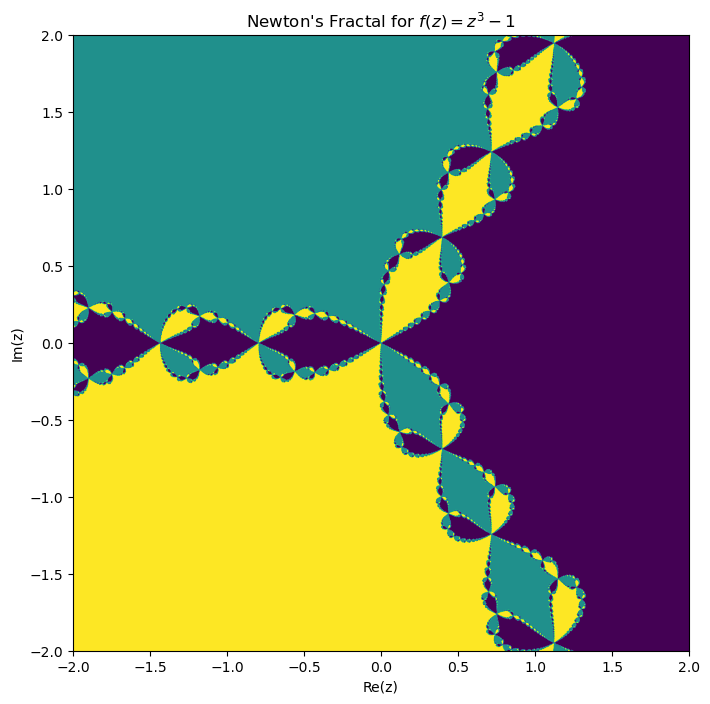

In [20]:
n = int(input('Enter order: '))
# n_samples = 2000
# samples = np.linspace(-2, 2, n_samples)
n_samples = 2000
x_range = (-2, 2)
y_range = (-2, 2)
max_iter = 200
x_val = np.linspace(x_range[0], x_range[1], n_samples)
y_val = np.linspace(y_range[0], y_range[1], n_samples)
X, Y = np.meshgrid(x_val, y_val)
Z = X + 1j * Y  # complex grid

cmap_name = 'viridis'
colourmap = plt.get_cmap(cmap_name)
# colours = colourmap(np.linspace(0, 1, n))

roots = [np.exp(2j * np.pi * k/n) for k in range(n)]
root_ind = np.full(Z.shape, -1) # stores the index of which root each point converges to
iters = np.zeros(Z.shape) # no of iterations needed to reach the root
# root_points = {r: [] for r in roots}

for i in range(n_samples):
    for j in range(n_samples):
        root, iterss = nr_comp(Z[i, j], n)
        iters[i, j] = iterss  # storing iteration count
        if root is not None:
            root_ind[i, j] = np.argmin(np.abs(roots - root)) # finding the closest root reached

# for (x, y) in cart(samples, samples):
#     points(x, y, n)

div = iters >= max_iter - 1 # True marks the points that fail to converge

plt.figure(figsize = (8, 8))
plt.imshow(root_ind, cmap = colourmap, origin = 'lower', extent = [*x_range, *y_range])

# divergence points/critical points - contour lines instead of gaps
plt.contour(X, Y, div, levels = [0.5], colors = 'white', linewidths = 0.5)

plt.title(f"Newton's Fractal for $f(z) = z^{n} - 1$")
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()